In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set()

In [4]:
df = pd.read_csv(f'output/waze/2019_09_raw.csv', index_col=0)

df = df.assign(relPubMillis=(df.pubMillis - np.min(df.pubMillis))/60000)

In [5]:
df

,country,nThumbsUp,city,reportRating,confidence,reliability,type,uuid,roadType,magvar,subtype,street,pubMillis,lng,lat,reportDescription,relPubMillis
0,US,0,"Nashville, TN",3,2,10,ACCIDENT,f417e3f8-99c6-3bc9-9c40-ec10012aa732,7.0,94,ACCIDENT_MAJOR,Church St E,1567547736000,-86.774783,36.033156,NaN,4189.666667
1,US,0,"Nashville, TN",2,1,8,ACCIDENT,d19a882b-bd4c-3b85-ae8b-cb455bc5aaec,6.0,83,NaN,Harding Pl,1567547666000,-86.754181,36.081238,NaN,4188.500000
2,US,0,"Nashville, TN",1,0,8,ACCIDENT,cdfc3bb1-a529-385b-9b5b-6ff17c52330a,6.0,185,ACCIDENT_MINOR,Bell Rd,1567547791000,-86.625292,36.151202,NaN,4190.583333
3,US,0,"Nashville, TN",2,1,8,ACCIDENT,bc9ba1b4-41b7-3f4a-ae17-082ef1f90632,3.0,267,NaN,I-40 W,1567547811000,-86.993218,36.078076,NaN,4190.916667
4,US,0,"Brentwood, TN",3,2,9,ACCIDENT,84ed8d89-42ed-3748-97bd-a8794368805d,3.0,167,ACCIDENT_MINOR,I-65 S,1567548880000,-86.785430,36.013545,NaN,4208.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51858,US,0,"Nashville, TN",4,2,9,ACCIDENT,27e05ab5-3a5c-32a0-aad8-750a93feb49c,3.0,62,ACCIDENT_MAJOR,I-40 E,1569452546000,-86.767452,36.151925,NaN,35936.500000
51867,US,0,"Nashville, TN",3,0,5,ACCIDENT,5327e90d-7d09-37df-9e54-d1fd0944846a,6.0,94,ACCIDENT_MINOR,Thompson Ln,1569442557000,-86.749766,36.111229,NaN,35770.016667
51868,US,0,"Nashville, TN",3,1,7,ACCIDENT,0d1d2a8f-e6b0-3401-9064-48314d6d2325,3.0,61,ACCIDENT_MINOR,I-40 E,1569442483000,-86.770235,36.150728,NaN,35768.783333
51873,US,0,"Nashville, TN",1,1,7,ACCIDENT,9984d2f0-2037-3040-85c1-61d8465db477,6.0,153,NaN,4th Ave S,1569440860000,-86.770522,36.150755,NaN,35741.733333


In [6]:
X = df[['lng', 'lat', 'relPubMillis']].values

For n_clusters = 7095  with eps= 0.5 The average silhouette_score is : 0.8348719796041005
For n_clusters = 6967  with eps= 0.6 The average silhouette_score is : 0.8353352652365634
For n_clusters = 6837  with eps= 0.7 The average silhouette_score is : 0.835209656255805
For n_clusters = 6737  with eps= 0.8 The average silhouette_score is : 0.8358295044637596
For n_clusters = 6619  with eps= 0.9 The average silhouette_score is : 0.8351374367137653


[]

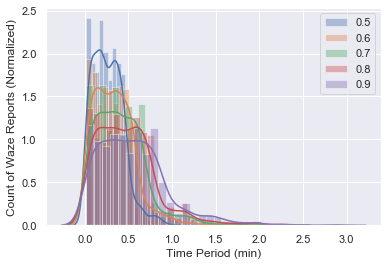

In [45]:
for eps in range(5, 10):
    eps = eps / 10
    clusterer = DBSCAN(eps=eps, min_samples=2).fit(X)
    cluster_labels = clusterer.labels_
    df = df.assign(labels=cluster_labels)
    n_clusters = len(np.unique(clusterer.labels_))
    silhouette_avg = metrics.silhouette_score(X, clusterer.labels_, metric='euclidean')
    print("For n_clusters =", n_clusters, " with eps=", eps,
          "The average silhouette_score is :", silhouette_avg)
    x = df[df.labels != -1].groupby('labels').pubMillis.apply(lambda x: (max(x) - min(x))/60000).sort_values()
    sns.distplot([i for i in x if 0 < i < 50], label=eps);

plt.legend()

plt.xlabel('Time Period (min)')
plt.ylabel('Count of Waze Reports (Normalized)')

plt.plot()

For n_clusters = 6737  with eps= 0.8 The average silhouette_score is : 0.8358295044637596


[]

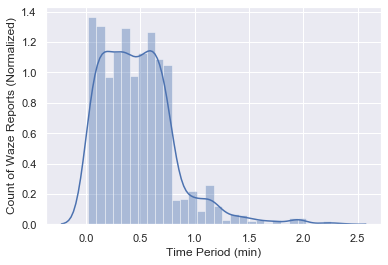

In [47]:
eps = 0.8

clusterer = DBSCAN(eps=eps, min_samples=2).fit(X)
cluster_labels = clusterer.labels_
df = df.assign(labels=cluster_labels)
n_clusters = len(np.unique(clusterer.labels_))
silhouette_avg = metrics.silhouette_score(X, clusterer.labels_, metric='euclidean')
print("For n_clusters =", n_clusters, " with eps=", eps,
      "The average silhouette_score is :", silhouette_avg)
x = df[df.labels != -1].groupby('labels').pubMillis.apply(lambda x: (max(x) - min(x))/60000).sort_values()
sns.distplot([i for i in x if 0 < i < 100], label=eps, norm_hist=False, axlabel='Time Period (min)');

plt.ylabel('Count of Waze Reports (Normalized)')

plt.plot()

[]

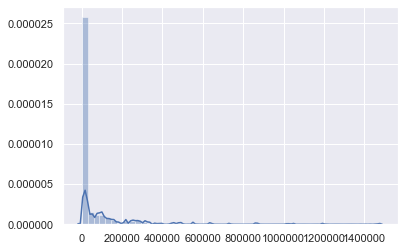

In [9]:
from pyproj import Proj
from shapely.geometry import shape

proj = Proj("+proj=aea +lat_1=37.0 +lat_2=41.0 +lat_0=39.0 +lon_0=-106.55")

x_area = df[df.labels != -1].groupby('labels') \
    .apply(lambda x: proj([min(x.lng), max(x.lng), min(x.lng), max(x.lng)], [min(x.lat), min(x.lat), max(x.lat), max(x.lat)])) \
    .apply(lambda x: shape({"type": "Polygon", "coordinates": [zip(*x)]}).area)

sns.distplot([a for a in x_area if 0 < a <= 2*3.14*(1500)**2], label=eps);

plt.plot()

In [10]:
import h3

In [11]:
df, features = None, None

eps = 0.8

for month in [10, 11, 12]:
    if df is None:
        df = pd.read_csv(f'output/waze/2019_{month}_raw.csv', index_col=0)
    else:
        df = df.append(pd.read_csv(f'output/waze/2019_{month}_raw.csv', index_col=0), sort=False)
    if features is None:
        features = pd.read_pickle(f'output/waze/2019_{month}_100_6_features.pkl')
    else:
        features = features.append(pd.read_pickle(f'output/waze/2019_{month}_100_6_features.pkl'), sort=False)

df = df.assign(relPubMillis=(df.pubMillis - np.min(df.pubMillis))/60000)
X = df[['lng', 'lat', 'relPubMillis']].values
clusterer = DBSCAN(eps=eps, min_samples=2).fit(X)
cluster_labels = []
c_max = np.max(clusterer.labels_)
for c in clusterer.labels_:
    if c == -1:
        c_max += 1
        cluster_labels.append(c_max)
    else:
        cluster_labels.append(c)
features = features.assign(cluster_label=cluster_labels)
df = df.assign(cluster_label=cluster_labels)

In [12]:
df

,country,nThumbsUp,city,reportRating,confidence,reliability,type,uuid,roadType,magvar,subtype,street,pubMillis,lng,lat,reportDescription,relPubMillis,cluster_label
0,US,0,"Nashville, TN",2,0,6,ACCIDENT,5cd843d9-6e32-3c62-8da6-cffb58c55ea7,7.0,95,ACCIDENT_MINOR,Cloverland Dr,1570135370000,-86.747827,36.030807,NaN,4187.483333,0
1,US,0,"Nashville, TN",5,0,5,ACCIDENT,62384d17-b6bc-3863-8fce-058ed5188dda,6.0,357,ACCIDENT_MINOR,Old Hickory Blvd,1570135982000,-86.624671,36.231919,NaN,4197.683333,1
2,US,0,"Nashville, TN",0,0,5,ACCIDENT,aa524d60-a914-34fb-8cc4-690b452dc256,6.0,1,NaN,Old Hickory Blvd,1570136864000,-86.625572,36.225101,NaN,4212.383333,2
3,US,0,"Nashville, TN",3,0,8,ACCIDENT,1ba50a00-ecfb-3ea6-8899-a94117d7472d,3.0,236,NaN,I-40 W,1570135066000,-86.815109,36.168179,NaN,4182.416667,3
4,US,0,"Nashville, TN",3,0,6,ACCIDENT,de74e6d3-bc7c-304e-9b16-577d1d28f2c8,3.0,161,ACCIDENT_MAJOR,I-24 E,1570135891000,-86.812669,36.302299,NaN,4196.166667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50443,US,0,"Nashville, TN",4,4,10,ACCIDENT,e76fe4e7-4d54-3048-b542-4a09fdf1a697,3.0,154,NaN,I-24 E,1577232278000,-86.766115,36.168500,NaN,122469.283333,6735
50460,US,0,"Nashville, TN",0,0,6,ACCIDENT,830fc2fc-d144-378c-911b-b6d558b6c6cb,3.0,6,NaN,I-65 N,1577310140000,-86.775226,36.214167,NaN,123766.983333,8947
50504,US,0,"Nashville, TN",4,2,10,ACCIDENT,e76fe4e7-4d54-3048-b542-4a09fdf1a697,3.0,154,NaN,I-24 E,1577232278000,-86.766115,36.168500,NaN,122469.283333,6735
50551,US,0,"Nashville, TN",2,0,5,ACCIDENT,4b669ed2-65c3-3a07-88af-668804f5eb74,7.0,24,ACCIDENT_MAJOR,Hobson Pike,1577232037000,-86.598100,36.057902,NaN,122465.266667,6734


In [13]:
import sys

sys.path.append('src/')

In [14]:
from datetime import timedelta
from tqdm import tqdm
import h3

from model import h3_get_neighbors, calculate_posterior

In [20]:
def predict_proba(df, incident_interval=25, time_step='1'):
    incident_interval = timedelta(minutes=incident_interval)
    features = []
    incident_id = 0
    regions = [r for r in df.columns if r.startswith('r_')]
    for label in tqdm(np.unique(df.cluster_label)):
        # for each region
        incident_records = df[df.cluster_label == label]
        col = regions[incident_records[regions].sum(axis=0).values.argmax()]
        col_sel = ['time', 'reliability', 'cluster_label'] + [col] + [x for x in h3_get_neighbors(col, regions) if x in df.columns]
        incident_time = np.min(incident_records.time)
        incident_records = incident_records[col_sel]
        incident_records = incident_records.drop('cluster_label', axis=1)
        time_steps, posterior_probs = calculate_posterior(incident_records, col, time_step)
        features_temp = []
        for time_step_val, posterior_proba in zip(time_steps, posterior_probs):
            if not np.math.isnan(posterior_proba):
                features_temp.append({
                    'incident_id': incident_id,
                    'start_time': incident_time,
                    'end_time': incident_time + incident_interval,
                    'time': time_step_val,
                    'region': col,
                    'posterior_proba': posterior_proba,
                })
        features += features_temp
        incident_id = incident_id + 1
    return pd.DataFrame(features)

In [21]:
posterior_proba = predict_proba(features)

100%|██████████| 8948/8948 [45:55<00:00,  3.25it/s]  


NameError: name 'year' is not defined

In [30]:
posterior_proba.to_pickle(f'output/2019_12_100_6_predict_proba_clustering_fixed.pkl')

In [48]:
posterior_proba = pd.read_pickle(f'output/2019_12_100_6_predict_proba_clustering_fixed.pkl')

In [49]:
from dataset import load_incidents, label_mapper

In [50]:
aperture_size = 6

In [51]:
incident_df = load_incidents(aperture_size)

In [70]:
max(incident_df.time)

Timestamp('2020-05-01 19:40:00')

In [72]:
incident_df[(incident_df.time < '2020-01-01 00:00:00') & (incident_df.time > '2019-09-30 23:59:59')]

,segment_id,lat,lng,timestamp,count,time,region
0,75,36.33152,-86.90128,1.575845e+09,1,2019-12-08 22:45:00,86264dd5fffffff
1,75,36.33207,-86.90093,1.575836e+09,1,2019-12-08 20:18:00,86264dd5fffffff
3,75,36.33300,-86.90461,1.573991e+09,1,2019-11-17 11:45:00,86264dc77ffffff
4,75,36.33348,-86.90408,1.574470e+09,1,2019-11-23 00:45:00,86264dd5fffffff
5,75,36.33348,-86.90408,1.574473e+09,1,2019-11-23 01:42:00,86264dd5fffffff
...,...,...,...,...,...,...,...
6959,2924,36.12613,-86.73117,1.576253e+09,1,2019-12-13 15:59:00,86264d10fffffff
6960,2925,36.12632,-86.72870,1.571375e+09,1,2019-10-18 05:00:00,86264d10fffffff
6961,2925,36.12636,-86.73049,1.570728e+09,1,2019-10-10 17:17:00,86264d10fffffff
6962,2925,36.12641,-86.72918,1.574297e+09,1,2019-11-21 00:51:00,86264d10fffffff


In [52]:
x = posterior_proba

In [58]:
x2 = model.extract_features(x, features)

100%|██████████| 7452/7452 [06:59<00:00, 17.75it/s]


In [53]:
y = label_mapper(x, incident_df)

In [54]:
import model

In [67]:
models = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
for m in models:
    print('model', m)
    cv_results, y_pred = model.cross_validate(x2, y, m)
    for k, v in cv_results.items():
        print(k, ',', np.average(v))
    print()

model LogisticRegression
fit_time , 0.16718225479125975
score_time , 0.010781812667846679
test_accuracy , 0.6132821087599422
test_precision , 0.2987506555769003
test_recall , 0.6765217391304348
test_f1 , 0.35862143260905205
test_roc_auc , 0.7050468796605058

model DecisionTreeClassifier
fit_time , 0.1056056022644043
score_time , 0.011596393585205079
test_accuracy , 0.6452463325816196
test_precision , 0.28448066579016495
test_recall , 0.548695652173913
test_f1 , 0.30631532323484467
test_roc_auc , 0.6150031967136405

model RandomForestClassifier
fit_time , 2.9267991065979
score_time , 0.10627422332763672
test_accuracy , 0.6061749467723567
test_precision , 0.29893853854092234
test_recall , 0.6669565217391303
test_f1 , 0.3544802241347038
test_roc_auc , 0.6925850470312594



In [74]:
xt = pd.read_pickle(f'output/2019_12_100_6_predict_proba.pkl')

In [77]:
xt

,incident_id,start_time,end_time,time,region,posterior_proba,avg_reliability,count,rand_porba,priors
0,0,2019-09-30 23:53:00,2019-10-01 00:18:00,2019-09-30 23:53:00,r_86264d027ffffff,1.000000,7.000000,3,0.181164,0.000421
1,0,2019-09-30 23:53:00,2019-10-01 00:18:00,2019-09-30 23:54:00,r_86264d027ffffff,1.000000,7.000000,3,0.681182,0.000421
2,0,2019-09-30 23:53:00,2019-10-01 00:18:00,2019-09-30 23:55:00,r_86264d027ffffff,1.000000,7.000000,3,0.430384,0.000421
3,0,2019-09-30 23:53:00,2019-10-01 00:18:00,2019-09-30 23:56:00,r_86264d027ffffff,1.000000,7.000000,3,0.760133,0.000421
4,0,2019-09-30 23:53:00,2019-10-01 00:18:00,2019-09-30 23:57:00,r_86264d027ffffff,1.000000,7.000000,3,0.791039,0.000421
...,...,...,...,...,...,...,...,...,...,...
36954,6234,2019-12-22 23:13:42,2019-12-22 23:38:42,2019-12-22 23:36:00,r_86264d56fffffff,0.001263,5.555556,9,0.818511,0.000421
36955,6234,2019-12-22 23:13:42,2019-12-22 23:38:42,2019-12-22 23:37:00,r_86264d56fffffff,0.001263,5.555556,9,0.406040,0.000421
36956,6235,2019-12-23 00:21:51,2019-12-23 00:46:51,2019-12-23 00:21:00,r_86264d56fffffff,0.000842,5.500000,4,0.634843,0.000421
36957,6236,2019-12-29 16:28:30,2019-12-29 16:53:30,2019-12-29 16:28:00,r_86264d56fffffff,0.000842,6.111111,9,0.158062,0.000421
